IMPORTING LIBRARIES

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import accuracy_score, classification_report

###### READING AND DISPLAYING DATA

In [10]:
data= pd.read_csv("data.csv")
data.head()

,age,gender,education,income,location,poverty,low_education,cultural_beliefs,exposure_to_violence,other_risk_factors,outcome
0,57,Female,Secondary,"Less than 10,000",Rural,0,0,0,0,0,0
1,42,Female,Secondary,"More than 100,000",Urban,1,0,0,1,1,1
2,27,Non-binary,Primary,"50,000 - 100,000",Urban,1,0,1,0,1,0
3,25,Non-binary,University,"10,000 - 50,000",Urban,1,0,0,1,0,1
4,52,Male,University,"Less than 10,000",Rural,1,0,1,1,1,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   1000 non-null   int64 
 1   gender                1000 non-null   object
 2   education             1000 non-null   object
 3   income                1000 non-null   object
 4   location              1000 non-null   object
 5   poverty               1000 non-null   int64 
 6   low_education         1000 non-null   int64 
 7   cultural_beliefs      1000 non-null   int64 
 8   exposure_to_violence  1000 non-null   int64 
 9   other_risk_factors    1000 non-null   int64 
 10  outcome               1000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 86.1+ KB


### Exploratory data analysis
### print first rows of data
### check missing values

In [12]:
data.head()
data.describe()
data.isnull().sum()



age                     0
gender                  0
education               0
income                  0
location                0
poverty                 0
low_education           0
cultural_beliefs        0
exposure_to_violence    0
other_risk_factors      0
outcome                 0
dtype: int64

In [33]:
data["income"] = data["income"].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes
data['location'] = data['location'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data.dtypes

age                     int64
gender                   int8
education                int8
income                   int8
location                 int8
poverty                 int64
low_education           int64
cultural_beliefs        int64
exposure_to_violence    int64
other_risk_factors      int64
outcome                 int64
dtype: object

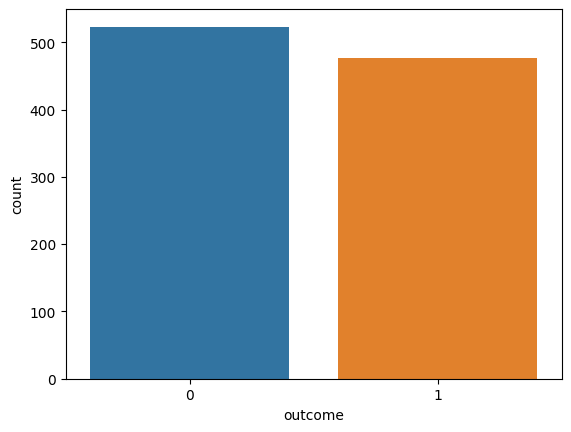

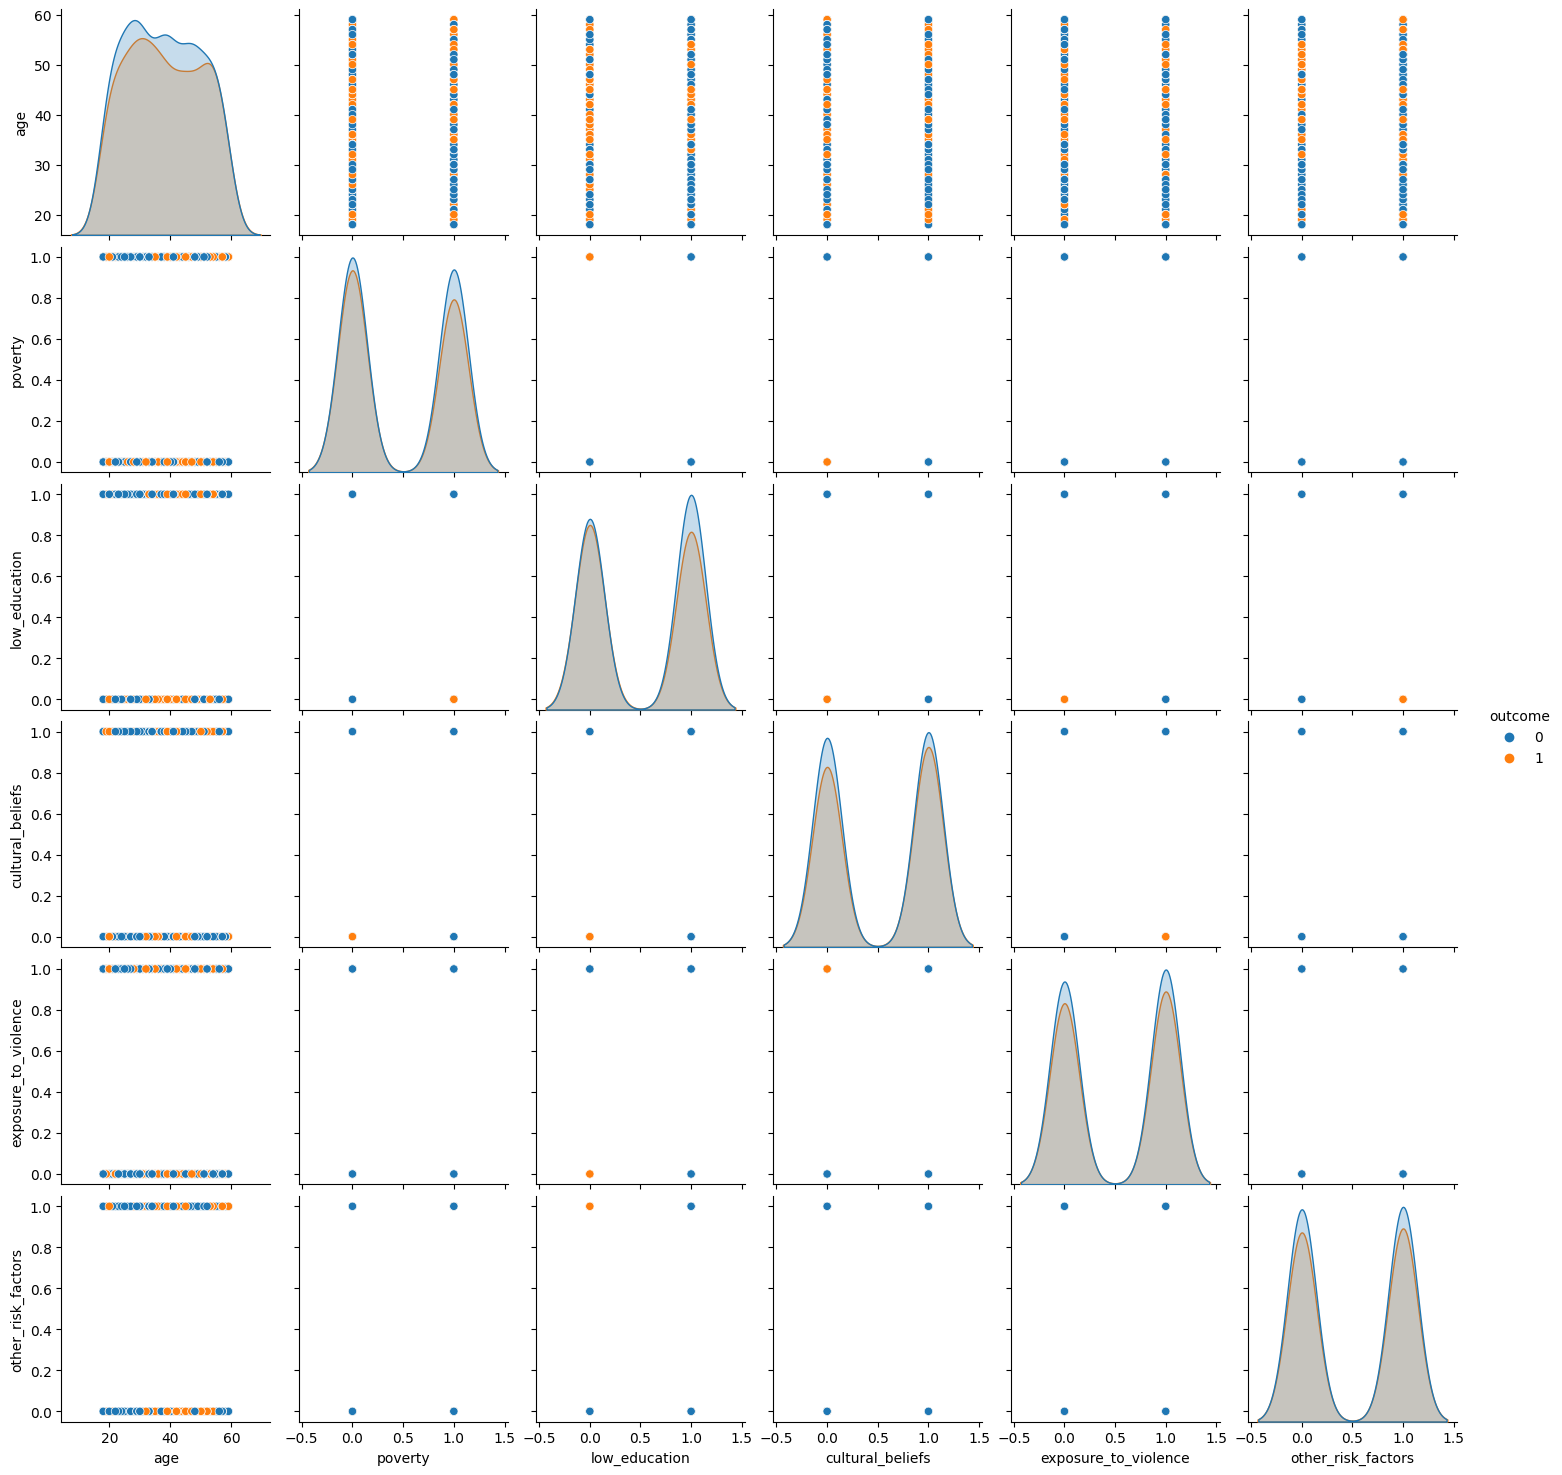

In [24]:
sns.countplot(x= 'outcome', data = data)
sns.pairplot(data, hue='outcome')

### Splitting the data into training and testing sets
### Creating the independent variables as X and dependent variabes as Y

In [43]:
X = data.drop('outcome', axis=1)
y = data['outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Build a random forest classification model.
### Initialize
### Fit the model to the training data

In [45]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

### Evaluate the model
### Print the accuracy  and the classification report of the model

In [47]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       109
           1       0.43      0.53      0.48        91

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.48      0.47      0.47       200



In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


### Fit the model

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make predictions on the test set
### Evaluate the model


In [51]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test,y_pred,squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R-squared:', r2)

RMSE: 0.5149780612110024
R-squared: -0.06947234006913172
